<a href="https://colab.research.google.com/github/DimpleeT/IBM_project/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

In [ ]:
data = pd.read_csv("/content/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

DATA VISUALIZATION AND CLEANING

<ipython-input-5-226b9283729a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

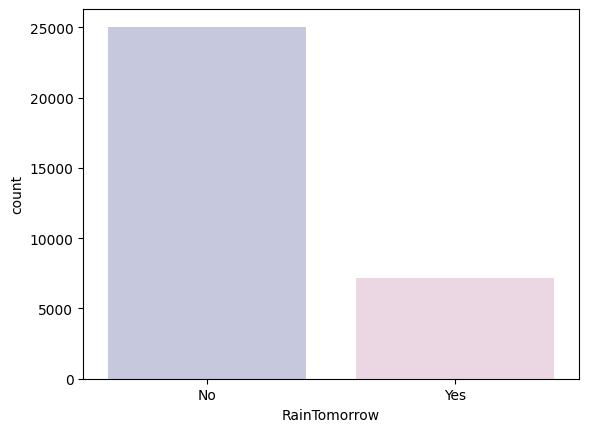

In [ ]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

<ipython-input-30-a58794e1f6ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
Location,1.000000,0.157457,-0.045054,0.021554,-0.032869,-0.123396,-0.086493,0.071818,0.077419,-0.110435,...,-0.048869,0.041795,0.041561,-0.071059,0.003119,-0.006244,-0.006001,-0.000397,0.000423,0.000389
MinTemp,0.157457,1.000000,0.653443,0.104535,0.254568,-0.084305,-0.193970,0.310143,-0.170438,-0.180700,...,0.612237,0.143879,0.161292,0.042336,-0.248163,0.440295,0.615309,0.006591,-0.018413,0.003979
MaxTemp,-0.045054,0.653443,1.000000,-0.091837,0.339949,0.174671,-0.187064,0.177163,-0.287385,-0.170811,...,0.966873,-0.168925,-0.127665,0.071543,-0.172843,0.334746,0.634627,0.007720,-0.013637,-0.010783
Rainfall,0.021554,0.104535,-0.091837,1.000000,-0.039646,-0.172433,0.015370,0.129963,0.051274,0.041299,...,-0.093922,0.513256,0.233187,-0.000602,-0.039862,0.058479,0.010382,-0.001958,-0.009833,0.017744
Evaporation,-0.032869,0.254568,0.339949,-0.039646,1.000000,0.154069,-0.040000,0.135072,-0.154057,-0.023049,...,0.336571,-0.094403,-0.057820,0.028503,-0.003215,0.057150,0.295999,0.001276,0.001016,-0.012663
Sunshine,-0.123396,-0.084305,0.174671,-0.172433,0.154069,1.000000,0.032973,-0.083804,0.019457,0.036830,...,0.186601,-0.196573,-0.281333,0.074823,0.022205,-0.025764,0.088762,0.001213,0.005484,-0.018588
WindGustDir,-0.086493,-0.193970,-0.187064,0.015370,-0.040000,0.032973,1.000000,0.157167,0.280868,0.521473,...,-0.191146,0.047897,-0.004078,0.009660,0.063495,-0.106743,-0.167267,-0.013360,0.015014,-0.004700
WindGustSpeed,0.071818,0.310143,0.177163,0.129963,0.135072,-0.083804,0.157167,1.000000,-0.098054,0.129828,...,0.135936,0.130667,0.185332,-0.025684,0.062475,-0.054983,0.211086,-0.015279,0.004480,-0.013186
WindDir9am,0.077419,-0.170438,-0.287385,0.051274,-0.154057,0.019457,0.280868,-0.098054,1.000000,0.229900,...,-0.282808,0.097476,0.010682,-0.029894,-0.006136,-0.027884,-0.184409,-0.005685,0.010845,-0.008165
WindDir3pm,-0.110435,-0.180700,-0.170811,0.041299,-0.023049,0.036830,0.521473,0.129828,0.229900,1.000000,...,-0.174267,0.066919,-0.010386,0.016253,0.050449,-0.086931,-0.162124,-0.014581,0.015208,0.000897


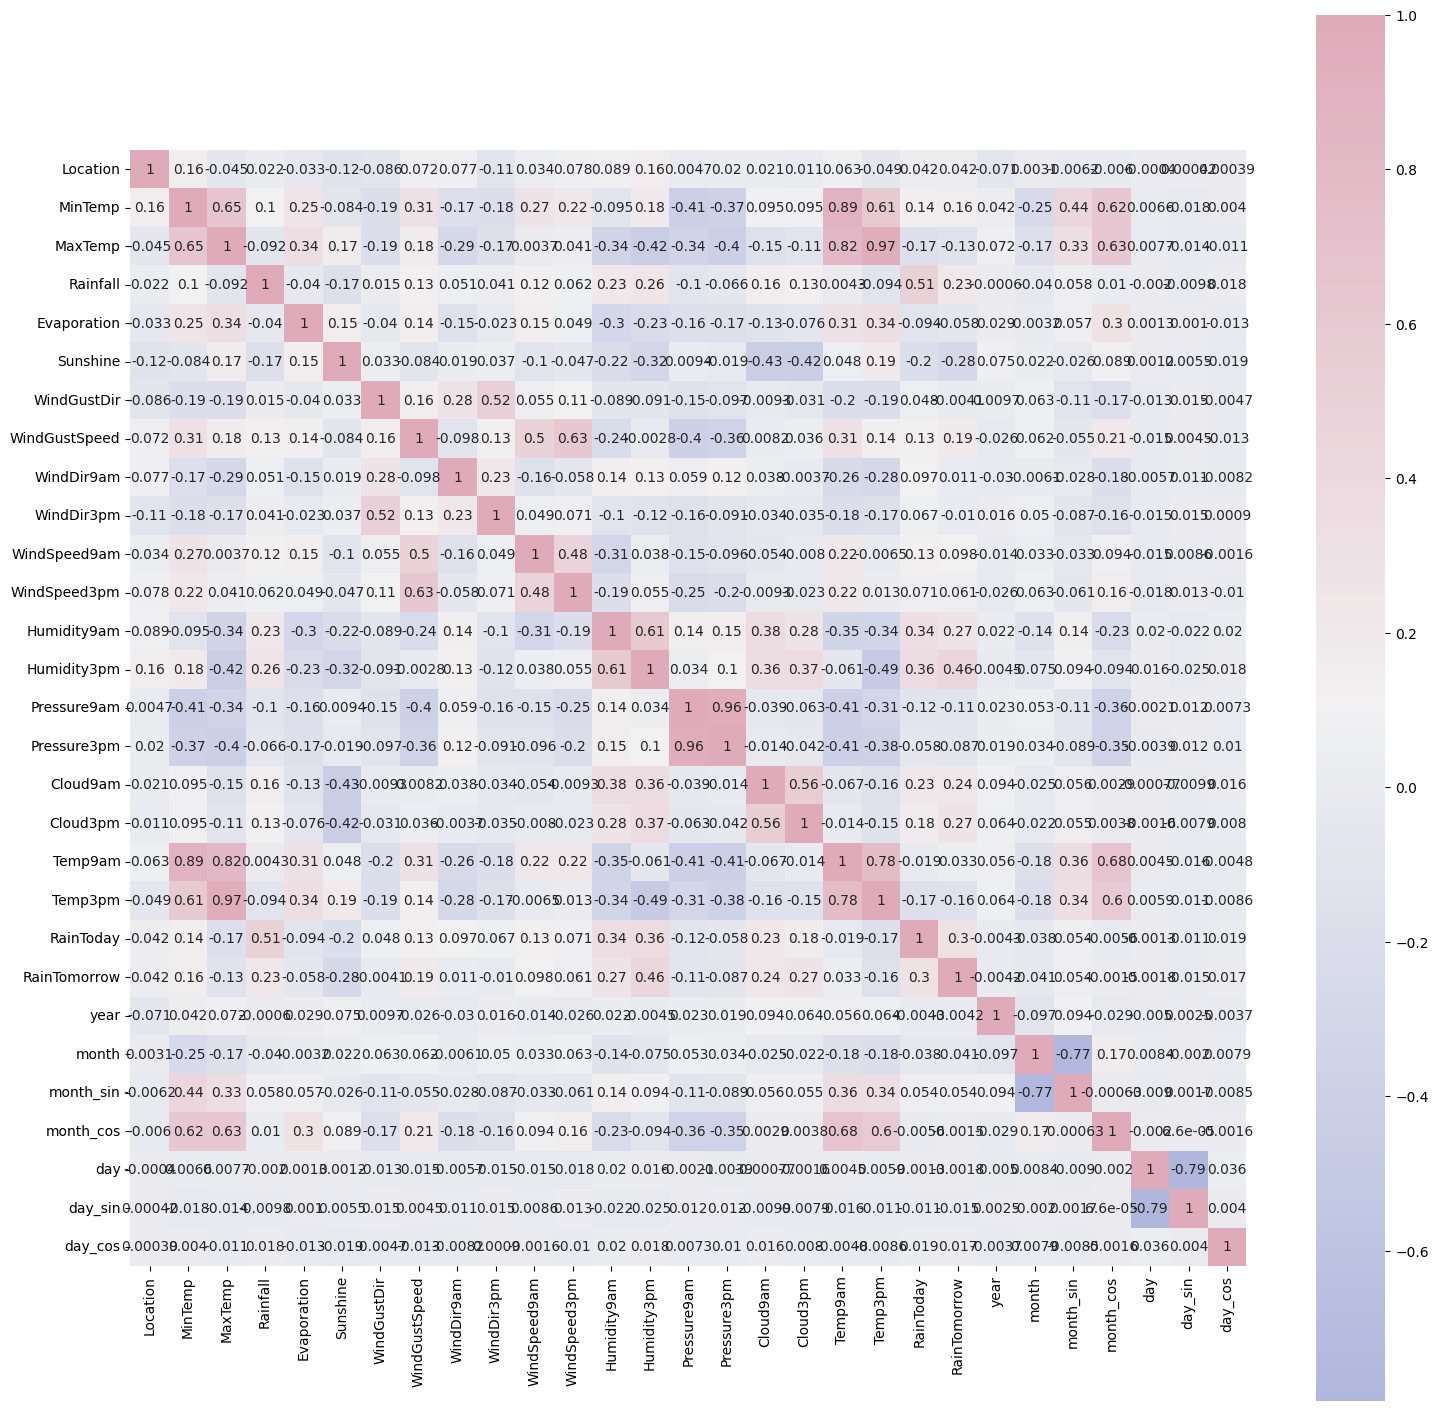

In [ ]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)


In [ ]:
lengths = data["Date"].str.len()
lengths.value_counts()

10    32897
Name: Date, dtype: int64

In [ ]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters.
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

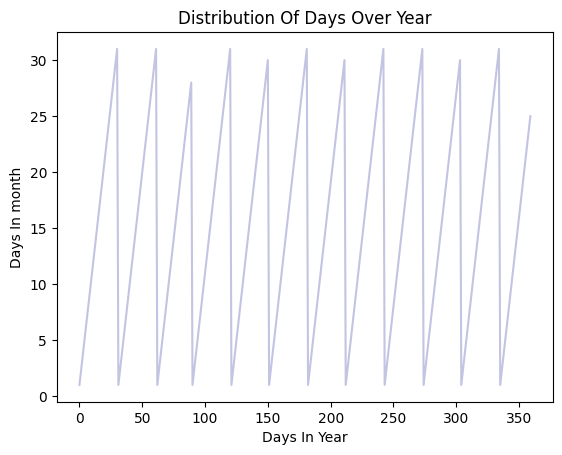

In [ ]:
# roughly a year's span section
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

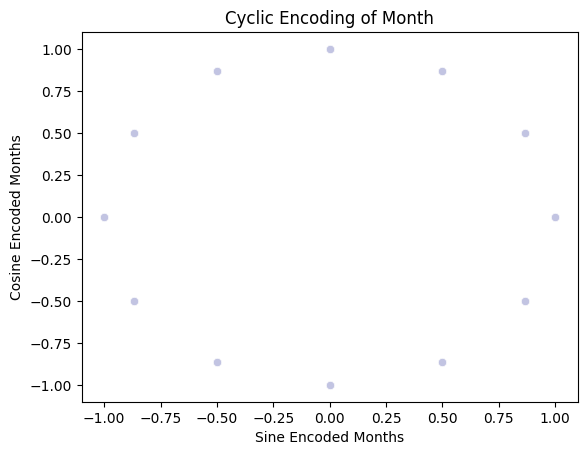

In [ ]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

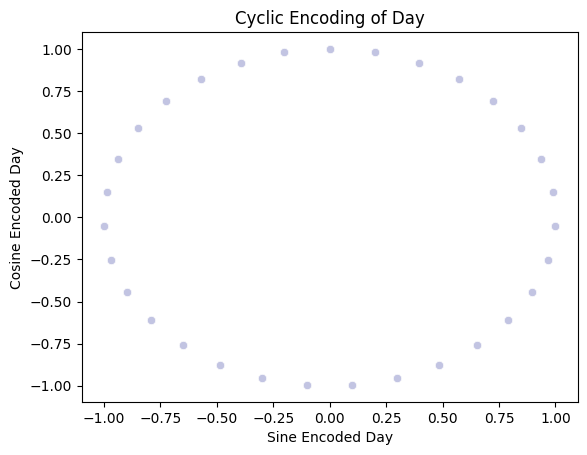

In [ ]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [ ]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 4867
WindDir9am 4468
WindDir3pm 2100
RainToday 687
RainTomorrow 687


In [ ]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [ ]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 499
MaxTemp 370
Rainfall 687
Evaporation 19072
Sunshine 23517
WindGustSpeed 4863
WindSpeed9am 829
WindSpeed3pm 1475
Humidity9am 666
Humidity3pm 1330
Pressure9am 6684
Pressure3pm 6680
Cloud9am 15811
Cloud3pm 16140
Temp9am 437
Temp3pm 1105
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [ ]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           32897 non-null  datetime64[ns]
 1   Location       32897 non-null  object        
 2   MinTemp        32897 non-null  float64       
 3   MaxTemp        32897 non-null  float64       
 4   Rainfall       32897 non-null  float64       
 5   Evaporation    32897 non-null  float64       
 6   Sunshine       32897 non-null  float64       
 7   WindGustDir    32897 non-null  object        
 8   WindGustSpeed  32897 non-null  float64       
 9   WindDir9am     32897 non-null  object        
 10  WindDir3pm     32897 non-null  object        
 11  WindSpeed9am   32897 non-null  float64       
 12  WindSpeed3pm   32897 non-null  float64       
 13  Humidity9am    32897 non-null  float64       
 14  Humidity3pm    32897 non-null  float64       
 15  Pressure9am    3289

DATA PREPROCESSING


In [ ]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           32897 non-null  datetime64[ns]
 1   Location       32897 non-null  int64         
 2   MinTemp        32897 non-null  float64       
 3   MaxTemp        32897 non-null  float64       
 4   Rainfall       32897 non-null  float64       
 5   Evaporation    32897 non-null  float64       
 6   Sunshine       32897 non-null  float64       
 7   WindGustDir    32897 non-null  int64         
 8   WindGustSpeed  32897 non-null  float64       
 9   WindDir9am     32897 non-null  int64         
 10  WindDir3pm     32897 non-null  int64         
 11  WindSpeed9am   32897 non-null  float64       
 12  WindSpeed3pm   32897 non-null  float64       
 13  Humidity9am    32897 non-null  float64       
 14  Humidity3pm    32897 non-null  float64       
 15  Pressure9am    3289

In [ ]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,32897.0,-6.911684e-18,1.000015,-1.576744,-0.940203,0.014609,0.969420,1.605962
MinTemp,32897.0,1.756000e-16,1.000015,-3.131416,-0.735070,0.115807,0.793035,2.859450
MaxTemp,32897.0,1.965510e-16,1.000015,-2.880392,-0.736306,-0.099780,0.603748,3.903630
Rainfall,32897.0,-3.135907e-17,1.000015,-0.278367,-0.278367,-0.278367,-0.213795,39.648283
Evaporation,32897.0,1.658804e-16,1.000015,-1.684440,-0.142900,-0.142900,-0.142900,27.202676
Sunshine,32897.0,-7.170872e-17,1.000015,-4.067159,0.148751,0.148751,0.148751,2.717064
WindGustDir,32897.0,4.017416e-17,1.000015,-1.600456,-0.705927,-0.258662,0.859499,1.754029
WindGustSpeed,32897.0,-2.769533e-16,1.000015,-2.431037,-0.567578,-0.162478,0.485681,7.939517
WindDir9am,32897.0,1.187946e-16,1.000015,-1.859508,-0.963356,0.156834,0.828948,1.501062
WindDir3pm,32897.0,6.090922e-17,1.000015,-1.651624,-0.750657,0.150310,0.826035,1.727002


<ipython-input-20-6d42aad80754>:5: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


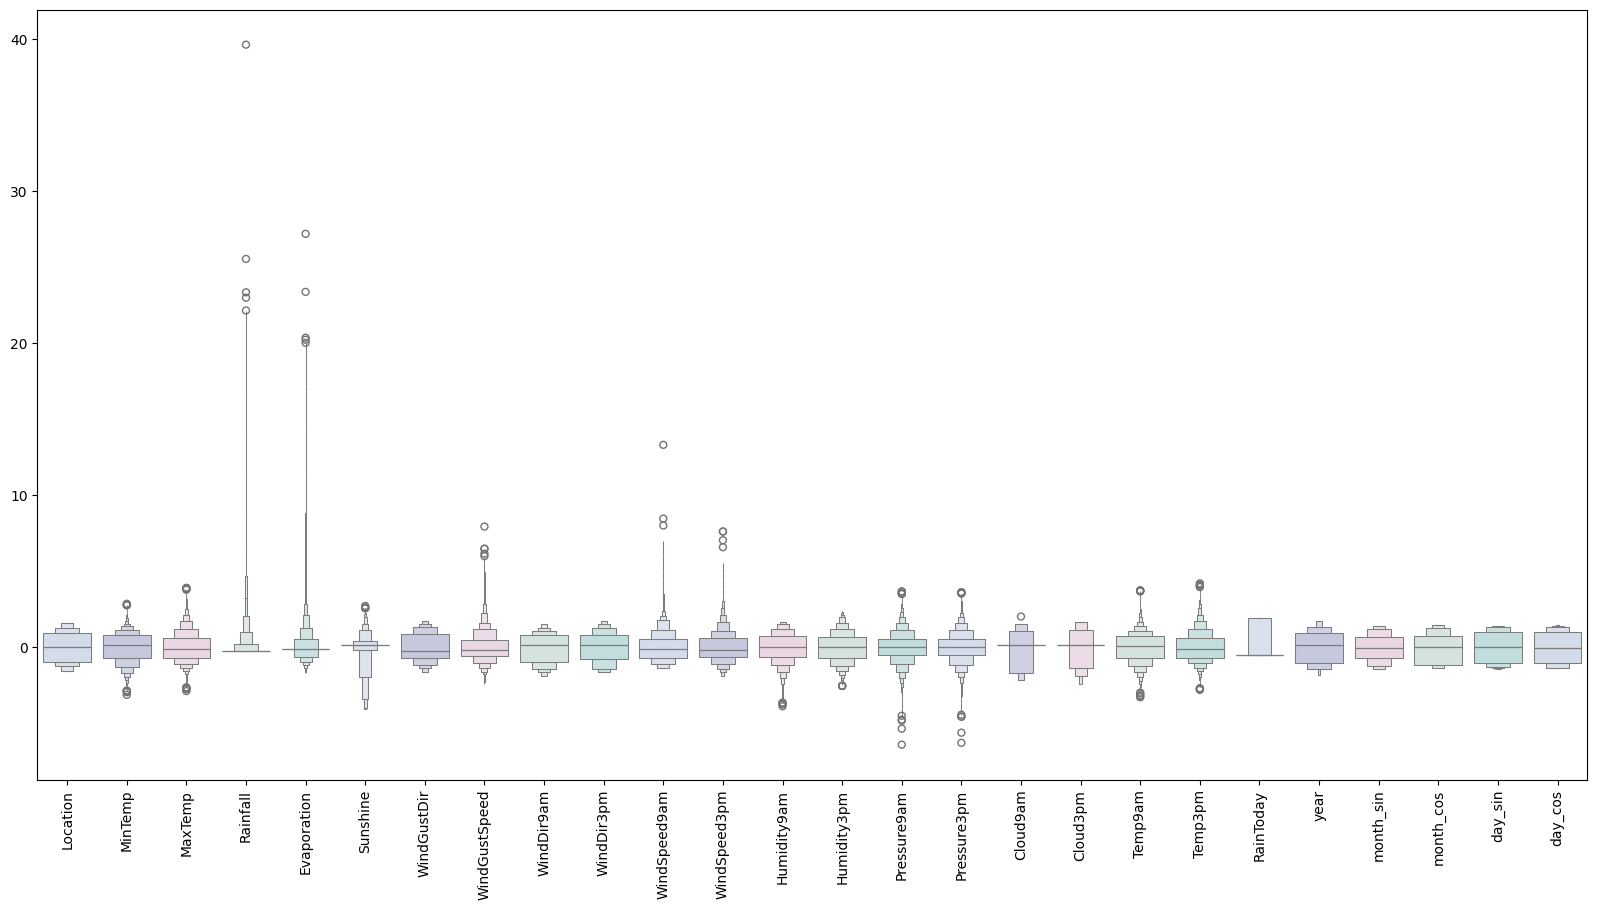

In [ ]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#full data for
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(28013, 27)

<ipython-input-22-0b9d7aa52ee8>:4: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


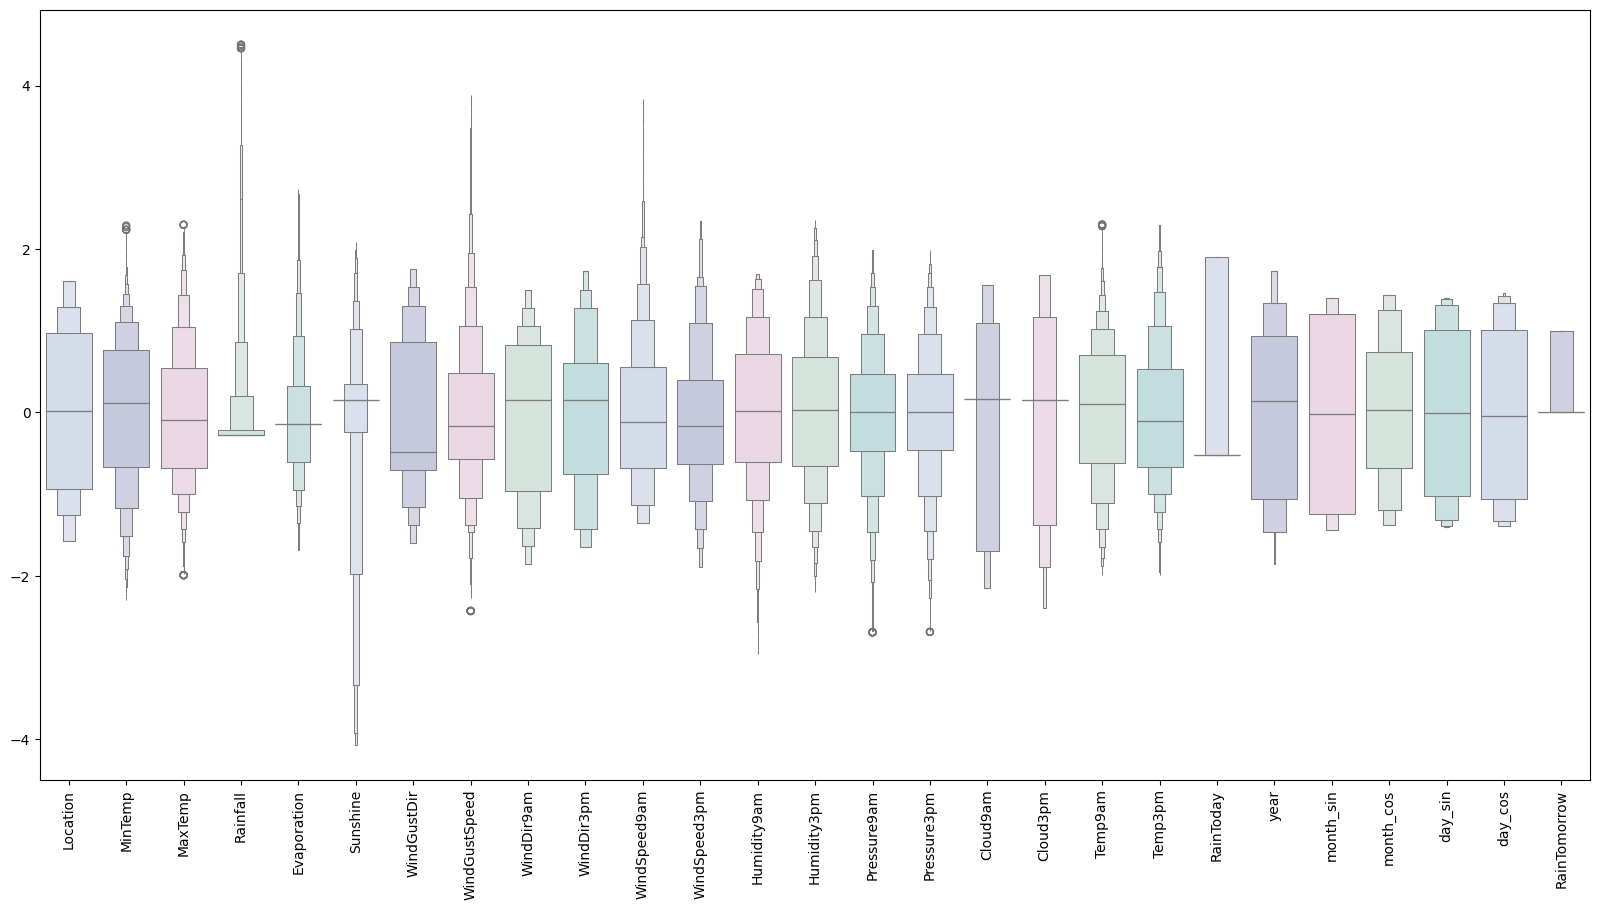

In [ ]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

MODEL BUILDING

In [ ]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(28013, 26)

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
561/561 [==============================] - 14s 16ms/step - loss: 0.6526 - accuracy: 0.7858 - val_loss: 0.4988 - val_accuracy: 0.7811
Epoch 2/150
561/561 [==============================] - 5s 9ms/step - loss: 0.4715 - accuracy: 0.7865 - val_loss: 0.4169 - val_accuracy: 0.7811
Epoch 3/150
561/561 [==============================] - 5s 9ms/step - loss: 0.4499 - accuracy: 0.7865 - val_loss: 0.4104 - val_accuracy: 0.7811
Epoch 4/150
561/561 [==============================] - 3s 6ms/step - loss: 0.4420 - accuracy: 0.7865 - val_loss: 0.4063 - val_accuracy: 0.7811
Epoch 5/150
561/561 [==============================] - 2s 4ms/step - loss: 0.4305 - accuracy: 0.7865 - val_loss: 0.4033 - val_accuracy: 0.7811
Epoch 6/150
561/561 [==============================] - 8s 15ms/step - loss: 0.4265 - accuracy: 0.7865 - val_loss: 0.4022 - val_accuracy: 0.7811
Epoch 7/150
561/561 [==============================] - 7s 13ms/step - loss: 0.4295 - accuracy: 0.7865 - val_loss: 0.4008 - val_accuracy: 0.

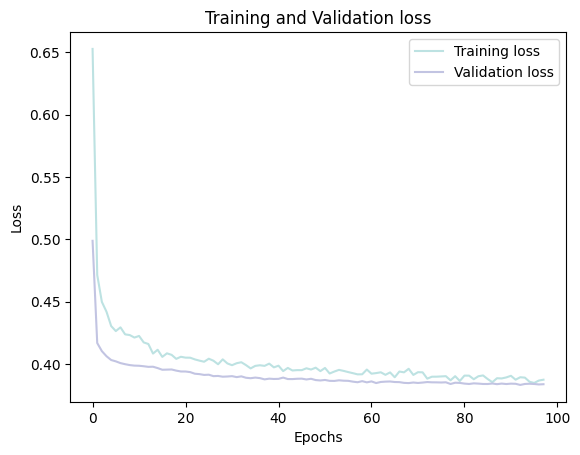

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

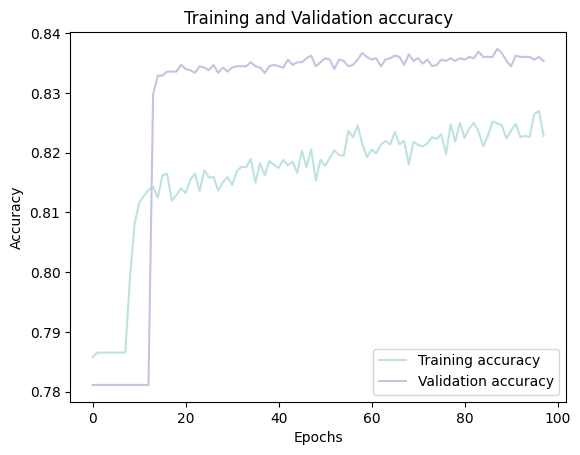

In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

CONCLUSION

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

176/176 [==============================] - 0s 2ms/step


<Axes: >

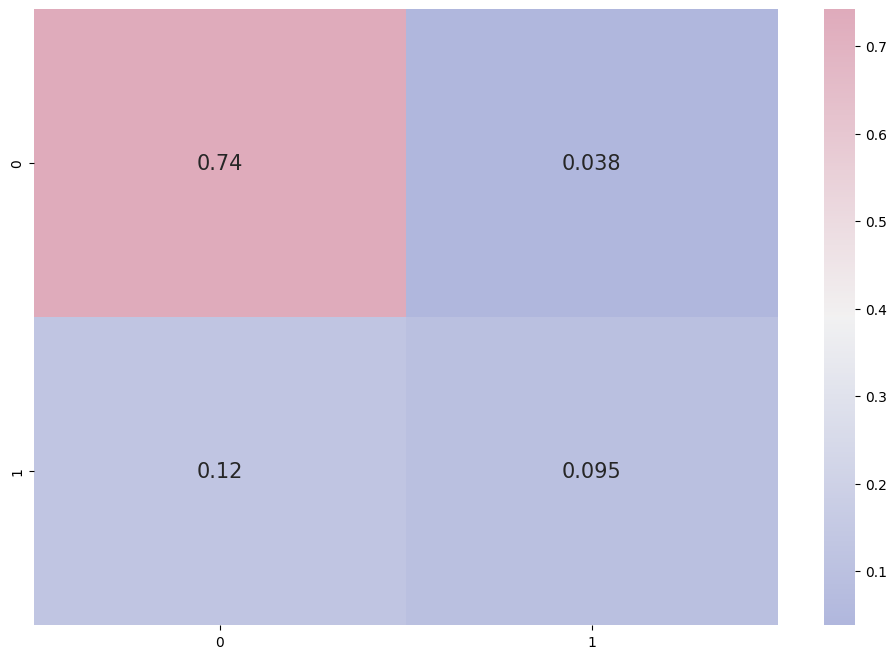

In [ ]:

# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4371
           1       0.71      0.43      0.54      1232

    accuracy                           0.84      5603
   macro avg       0.79      0.69      0.72      5603
weighted avg       0.82      0.84      0.82      5603

